In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
%matplotlib widget

In [ ]:
kgy0_full = pd.read_csv('../irradiated_analysis/spectral_files/0kGy_sn72.csv')
waveno_full = pd.read_csv('../mdi_optimization/cleaned_csvs/wave_no.csv')

In [ ]:
kgy0_amide = kgy0_full.iloc[1060:1380,:]
waveno_amide = waveno_full.iloc[1060:1380]

In [96]:
def annotator_amide(ax):
    ax.set(ylim=(0, 0.04))
    ax.set(xlim=(1100, 1900))

    # amide 1
    ax.axvspan(1600, 1690, color="#7570b3", alpha=0.55)
    ax.text(np.mean([1600, 1690]), 0.035, "Amide I", fontsize=5, horizontalalignment='center')

    # amide 2
    ax.axvspan(1480, 1575, color="#1b9e77", alpha=0.55)
    ax.text(np.mean([1480, 1575]), 0.035, "Amide II", fontsize=5, horizontalalignment='center')

    # amide 3
    ax.axvspan(1229, 1301, color="#d95f02", alpha=0.55)
    ax.text(np.mean([1229, 1301]), 0.035, "Amide III", fontsize=5, horizontalalignment='center')

In [131]:
def peak_finder(spectrum):
    peak_indeces, peak_params = find_peaks(spectrum, height=[0.009,0.04], distance=30)
    peak_x = waveno_amide.iloc[peak_indeces]
    peak_y = spectrum.iloc[peak_indeces]

    return peak_x, peak_y

def dip_finder(spectrum):
    peak_indeces, peak_params = find_peaks(-spectrum, distance=15)
    dip_x = waveno_amide.iloc[peak_indeces]
    dip_y = spectrum.iloc[peak_indeces]

    return dip_x, dip_y

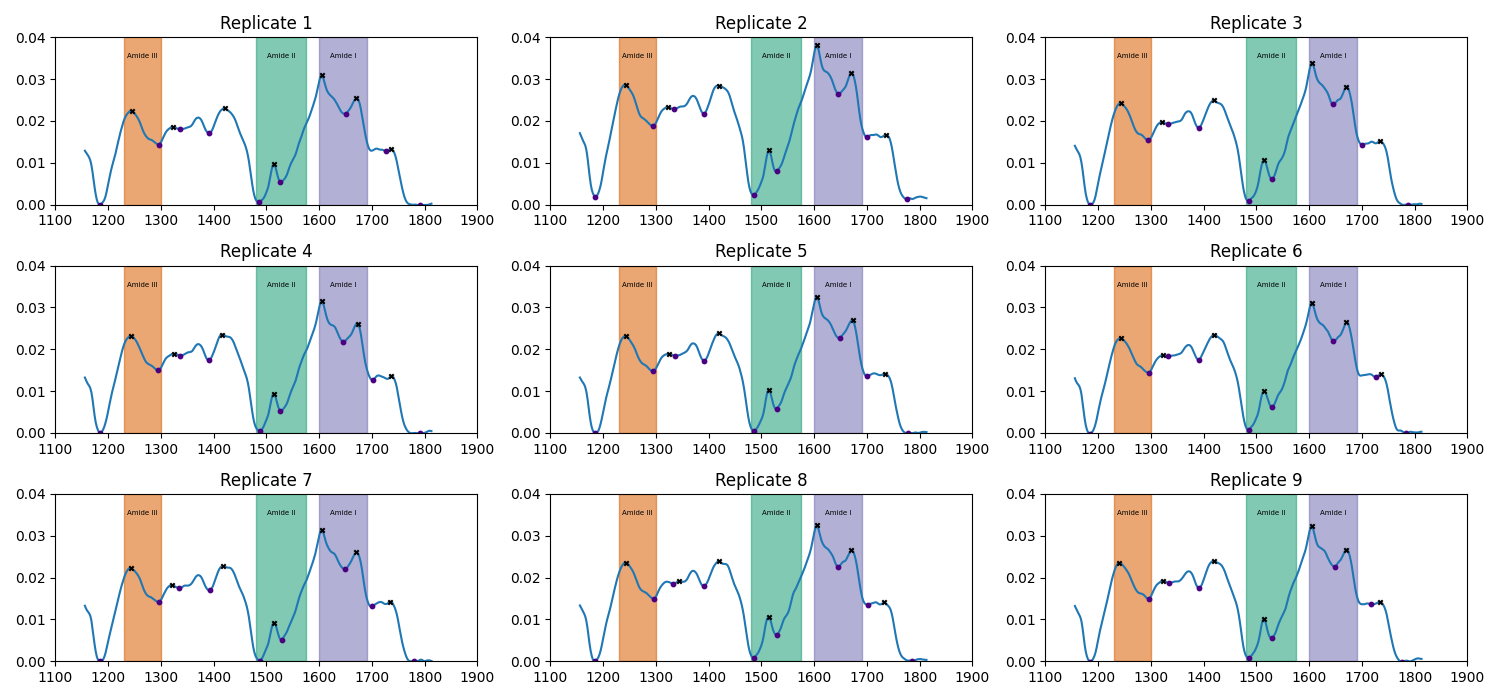

AttributeError: 'Canvas' object has no attribute 'key_press_event'

In [132]:
plt.close('all')
kgy0_amide_auc, axes = plt.subplots(3,3, figsize=(15,7))

for index, (axis, sample) in enumerate(zip(axes.ravel(), kgy0_amide), start=1):
    annotator_amide(axis)
    sample_spectrum = kgy0_amide[sample]
    axis.plot(waveno_amide, sample_spectrum, zorder=1)

    peak_x, peak_y = peak_finder(sample_spectrum)
    axis.scatter(peak_x, peak_y, marker='x', color='black', s=10, zorder=2)

    dip_x, dip_y = dip_finder(sample_spectrum)
    axis.scatter(dip_x, dip_y, marker='o', color='indigo', s=10, zorder=2)


    axis.set(title=f"Replicate {index}")
    


kgy0_amide_auc.tight_layout()